In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [7]:
min_fare = df[df['Fare'] == df['Fare'].max()]
min_fare

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [8]:
min_fare_info = min_fare[['Name', 'Survived' , 'Sex', 'Fare']]
min_fare_info

,Name,Survived,Sex,Fare
258,"Ward, Miss. Anna",1,female,512.3292
679,"Cardeza, Mr. Thomas Drake Martinez",1,male,512.3292
737,"Lesurer, Mr. Gustave J",1,male,512.3292


In [9]:
survived_df = df[df['Survived'] == 1]
# min_fare = survived_df[survived_df['Fare'] == survived_df['Fare'].min()]
# min_ticket_info = min_fare[['Name', 'Ticket_Price', 'Survived']]

# Sort the dataframe by Ticket_Price and get the first row (lowest fare)
min_fare_info = survived_df.sort_values('Fare').iloc[0:800][['Name', 'Fare', 'Survived','Sex']]
min_fare_info


,Name,Fare,Survived,Sex
271,"Tornquist, Mr. William Henry",0.0000,1,male
804,"Hedman, Mr. Oskar Arvid",6.9750,1,male
127,"Madsen, Mr. Fridtjof Arne",7.1417,1,male
19,"Masselmani, Mrs. Fatima",7.2250,1,female
875,"Najib, Miss. Adele Kiamie ""Jane""",7.2250,1,female
...,...,...,...,...
88,"Fortune, Miss. Mabel Helen",263.0000,1,female
341,"Fortune, Miss. Alice Elizabeth",263.0000,1,female
679,"Cardeza, Mr. Thomas Drake Martinez",512.3292,1,male
737,"Lesurer, Mr. Gustave J",512.3292,1,male


In [10]:
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.dropna().isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
871,False,False,False,False,False,False,False,False,False,False,False,False
872,False,False,False,False,False,False,False,False,False,False,False,False
879,False,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
np_array = df['Fare'].dropna().values
np_array.mean()

32.204207968574636

In [13]:
np.median(np_array)

14.4542

In [14]:
np.std(np_array)

49.6655344447741

In [15]:
survived = np.sum(df['Survived'])
total = len(df)
print("Survival Percentage:", (survived / total) * 100)

Survival Percentage: 38.38383838383838


In [16]:
filtered = df[(df['Age'] > 30) & (df['Survived'] == 1)]
print(filtered[['Name', 'Age', 'Sex']])

                                                  Name   Age     Sex
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0  female
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0  female
11                            Bonnell, Miss. Elizabeth  58.0  female
15                    Hewlett, Mrs. (Mary D Kingcome)   55.0  female
21                               Beesley, Mr. Lawrence  34.0    male
..                                                 ...   ...     ...
857                             Daly, Mr. Peter Denis   51.0    male
862  Swift, Mrs. Frederick Joel (Margaret Welles Ba...  48.0  female
865                           Bystrom, Mrs. (Karolina)  42.0  female
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  47.0  female
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  56.0  female

[124 rows x 3 columns]


In [17]:
df['Age'] = df['Age'].interpolate(method='linear')
df.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
sort_val=df.sort_values(by='Age',ascending=True, inplace=True)
print(sort_val)

None


In [19]:
df.groupby('Age')['Fare'].sum()

Age
0.42       8.5167
0.67      14.5000
0.75      38.5166
0.83      47.7500
0.92     151.5500
           ...   
70.00     81.5000
70.50      7.7500
71.00     84.1584
74.00      7.7750
80.00     30.0000
Name: Fare, Length: 155, dtype: float64

In [20]:
df.groupby(['Age','Name'])['Fare'].sum()

Age    Name                                
0.42   Thomas, Master. Assad Alexander          8.5167
0.67   Hamalainen, Master. Viljo               14.5000
0.75   Baclini, Miss. Eugenie                  19.2583
       Baclini, Miss. Helene Barbara           19.2583
0.83   Caldwell, Master. Alden Gates           29.0000
                                                ...   
70.50  Connors, Mr. Patrick                     7.7500
71.00  Artagaveytia, Mr. Ramon                 49.5042
       Goldschmidt, Mr. George B               34.6542
74.00  Svensson, Mr. Johan                      7.7750
80.00  Barkworth, Mr. Algernon Henry Wilson    30.0000
Name: Fare, Length: 891, dtype: float64

In [21]:
df.value_counts('Survived')

Survived
0    549
1    342
Name: count, dtype: int64

In [22]:
df.groupby('Pclass')['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [23]:
df.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [24]:
df.groupby('Pclass')['Survived'].count()

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [25]:
df['Survived'] == 1

803     True
755     True
644     True
469     True
78      True
       ...  
116    False
96     False
493    False
851    False
630     True
Name: Survived, Length: 891, dtype: bool

In [26]:
df['Survived'] == 0

803    False
755    False
644    False
469    False
78     False
       ...  
116     True
96      True
493     True
851     True
630    False
Name: Survived, Length: 891, dtype: bool

In [27]:
df['Age'].mean()

29.726060606060603

In [28]:
df.groupby(['Sex','Pclass'])['Survived'].mean()

Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64

In [29]:
def catogrize_age(age):
    if age < 18:
        print('Child')
    elif age < 60:
        print('Adult')
    else:
        print('Senior')

new_col = df['Age Catogery'] =df['Age'].apply(catogrize_age)
new_col.head(10)


Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Child
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adult
Adul

803    None
755    None
644    None
469    None
78     None
831    None
305    None
183    None
827    None
164    None
Name: Age, dtype: object

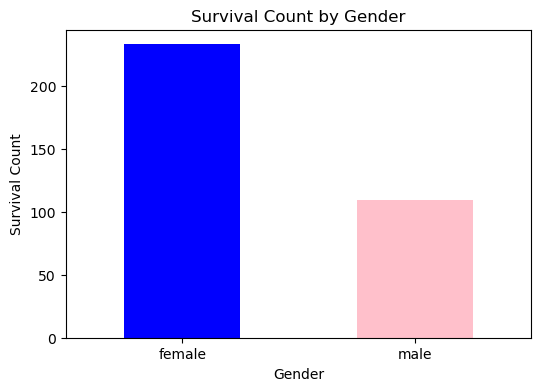

In [31]:
# 1. Gender-wise survival count
plt.figure(figsize=(6, 4))
df.groupby('Sex')['Survived'].sum().plot(kind='bar', color=['blue', 'pink'])
plt.title("Survival Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival Count")
plt.xticks(rotation=0)
plt.show()

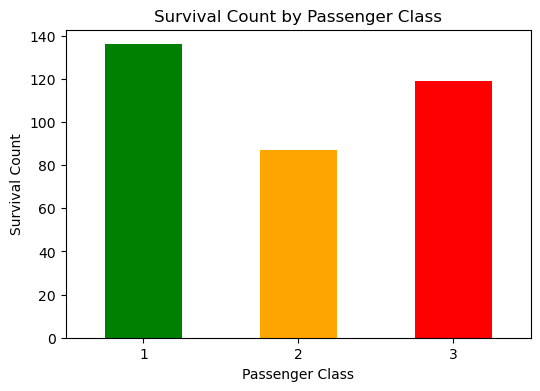

In [32]:
# 2. Class-wise survival count
plt.figure(figsize=(6, 4))
df.groupby('Pclass')['Survived'].sum().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title("Survival Count by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Count")
plt.xticks(rotation=0)
plt.show()

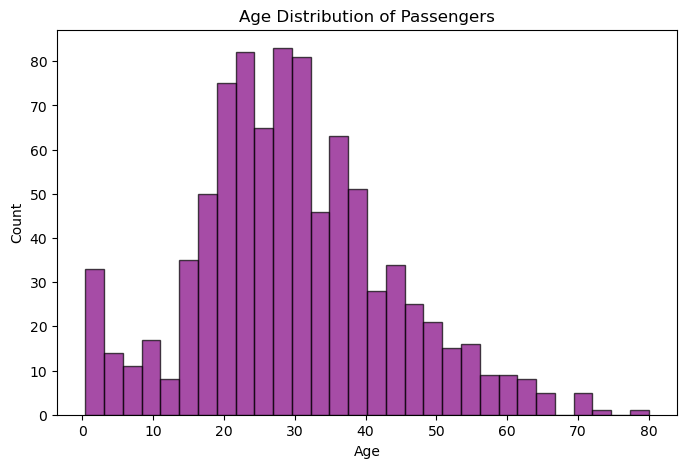

In [33]:
# 3. Age distribution of passengers
plt.figure(figsize=(8, 5))
plt.hist(df['Age'].dropna(), bins=30, color='purple', edgecolor='black', alpha=0.7)
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

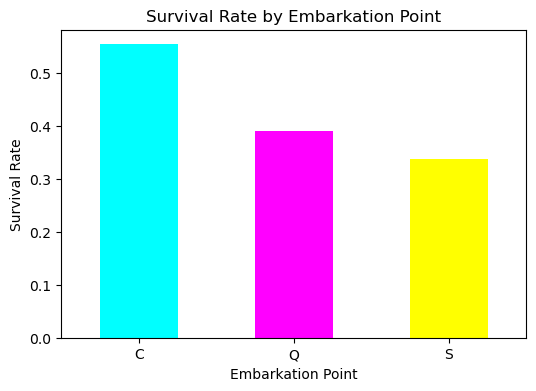

In [34]:
# 4. Survival rate by embarkation point
plt.figure(figsize=(6, 4))
df.groupby('Embarked')['Survived'].mean().plot(kind='bar', color=['cyan', 'magenta', 'yellow'])
plt.title("Survival Rate by Embarkation Point")
plt.xlabel("Embarkation Point")
plt.ylabel("Survival Rate")
plt.xticks(rotation=0)
plt.show()

In [35]:
from IPython.display import display, Markdown

summary = """
# **Titanic EDA - Summary & Conclusion**  

## 📊 **Key Findings:**  
### 1️⃣ Gender-wise Survival  
- **Females had a significantly higher survival rate** than males.  
- This suggests that the **"women and children first" policy** was followed.  

### 2️⃣ Class-wise Survival  
- **1st class passengers had the highest survival rate**.  
- **3rd class passengers were the most affected** (lowest survival rate).  

### 3️⃣ Age Distribution  
- **Younger passengers (especially children) had better survival chances**.  
- Most passengers were between **20-40 years old**.  

### 4️⃣ Survival Rate by Embarkation Point  
- Passengers who boarded from **C (Cherbourg) had a higher survival rate**.  
- Passengers from **S (Southampton) had the lowest survival rate**.  

## 🎯 **Conclusion:**  
- **Gender and Class were major factors in survival chances**.  
- **Wealthier passengers had a survival advantage** (1st class priority).  
- **Women and children were given priority for lifeboats**.  
- **The embarkation point may have played a role in survival differences**.  
"""

display(Markdown(summary))


# **Titanic EDA - Summary & Conclusion**  

## 📊 **Key Findings:**  
### 1️⃣ Gender-wise Survival  
- **Females had a significantly higher survival rate** than males.  
- This suggests that the **"women and children first" policy** was followed.  

### 2️⃣ Class-wise Survival  
- **1st class passengers had the highest survival rate**.  
- **3rd class passengers were the most affected** (lowest survival rate).  

### 3️⃣ Age Distribution  
- **Younger passengers (especially children) had better survival chances**.  
- Most passengers were between **20-40 years old**.  

### 4️⃣ Survival Rate by Embarkation Point  
- Passengers who boarded from **C (Cherbourg) had a higher survival rate**.  
- Passengers from **S (Southampton) had the lowest survival rate**.  

## 🎯 **Conclusion:**  
- **Gender and Class were major factors in survival chances**.  
- **Wealthier passengers had a survival advantage** (1st class priority).  
- **Women and children were given priority for lifeboats**.  
- **The embarkation point may have played a role in survival differences**.  
